In [53]:
import matplotlib.pyplot as plt
import numpy
import torch as t

from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [54]:
train_data = datasets.MNIST(
    "./data", train=True, download=True, transform=transforms.ToTensor()
)
test_data = datasets.MNIST(
    "./data", train=False, download=True, transform=transforms.ToTensor()
)

print(len(train_data), len(test_data))

60000 10000


In [77]:
class Autoencoder(nn.Module):
    def __init__(self, code_size):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, code_size),
        )
        self.decoder = nn.Sequential(
            nn.Linear(code_size, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid(), # Sigmod function to get values between 0 and 1
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded.view(-1, 1, 28, 28)
    


In [78]:
from torch.utils.data import DataLoader
def train(autoencoder, optimizer, data):
  train_loader = DataLoader(data, batch_size=128, shuffle=True)
  autoencoder.train()
  for img, _ in train_loader:
    optimizer.zero_grad()
    output = autoencoder(img)
    loss = nn.MSELoss()(output, img)
    loss.backward()
    optimizer.step()
    print(loss.item())

  
autoencoder = Autoencoder(code_size=16)
optimizer =t.optim.Adam(autoencoder.parameters(), lr=1e-3)


In [79]:
for epoch in range(10):
  print("Epoch: ", epoch)
  train(autoencoder, optimizer, train_data)

Epoch:  0
0.23138633370399475
0.22854778170585632
0.22519545257091522
0.2215220332145691
0.21687830984592438
0.20878981053829193
0.200572207570076
0.1908954381942749
0.18031537532806396
0.1692173033952713
0.15494711697101593
0.14230583608150482
0.12766318023204803
0.11621876060962677
0.10714754462242126
0.10092270374298096
0.0923469141125679
0.08951826393604279
0.0795537605881691
0.07954327017068863
0.07714682072401047
0.07463089376688004
0.07423122227191925
0.07754679024219513
0.076503224670887
0.06944636255502701
0.07690408825874329
0.07478195428848267
0.07583574205636978
0.07089845836162567
0.0736125260591507
0.07328862696886063
0.07276547700166702
0.06749556213617325
0.07670905441045761
0.0747871920466423
0.06956091523170471
0.07460734993219376
0.07332353293895721
0.07397935539484024
0.0708310678601265
0.07265706360340118
0.07411065697669983
0.0678664967417717
0.07276487350463867
0.07176753878593445
0.07107632607221603
0.06730964779853821
0.06686689704656601
0.07335464656352997
0.0

KeyboardInterrupt: 

torch.Size([1, 28, 28])


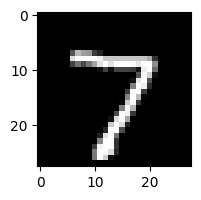

torch.Size([1, 28, 28])


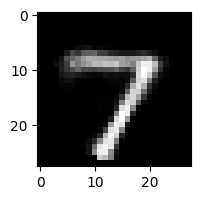

torch.Size([1, 28, 28])


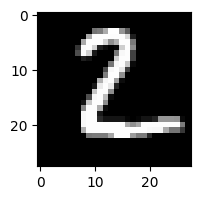

torch.Size([1, 28, 28])


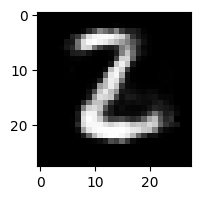

torch.Size([1, 28, 28])


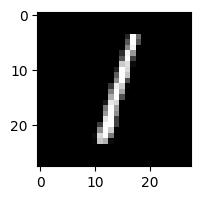

torch.Size([1, 28, 28])


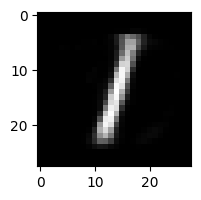

torch.Size([1, 28, 28])


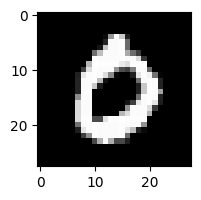

torch.Size([1, 28, 28])


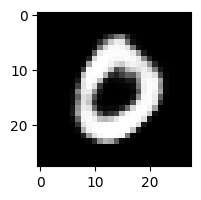

torch.Size([1, 28, 28])


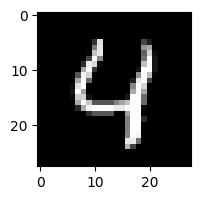

torch.Size([1, 28, 28])


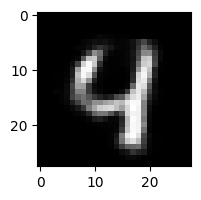

In [59]:

for i in range(5):
  image = test_data[i][0]
  plt.figure(figsize=(9, 2))
  plt.imshow(image[0], cmap="gray")
  print(image.shape)
  plt.show()
  encoded_image = autoencoder.forward(image.unsqueeze(0))[0].detach()
  print(encoded_image.shape)
  plt.figure(figsize=(9, 2))
  plt.imshow(encoded_image[0], cmap="gray")
  plt.show()
  

In [60]:
noise_factor = 0.3
train_data_clean_noisy = []
for img, _ in train_data:
  noisy_img = img + noise_factor * t.randn(*img.shape)
  noisy_img = t.clamp(noisy_img, 0., 1.)
  train_data_clean_noisy.append((img, noisy_img))


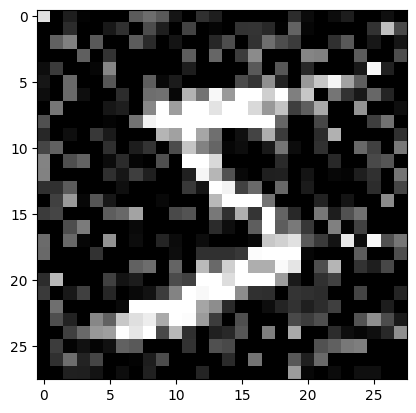

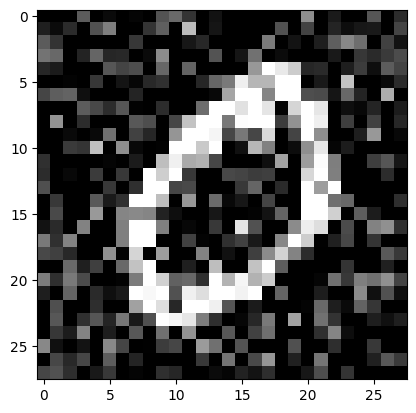

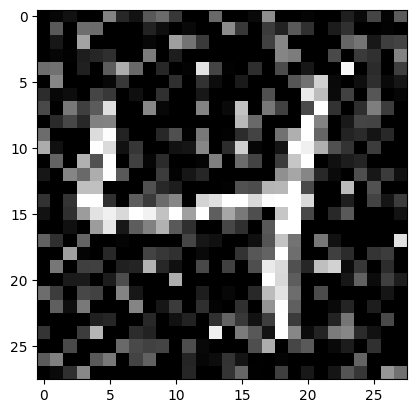

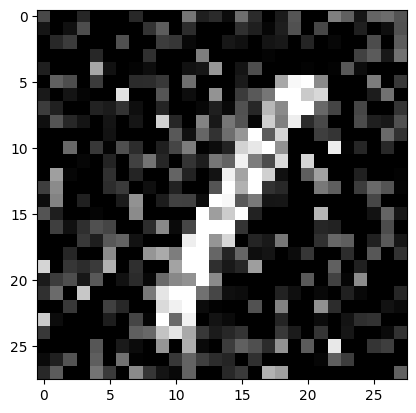

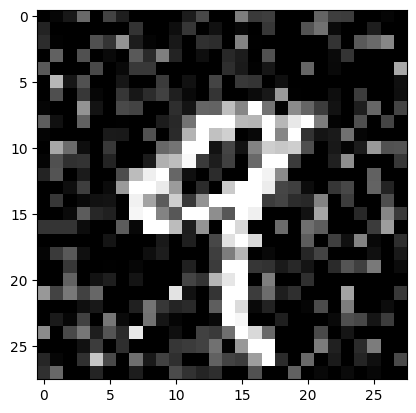

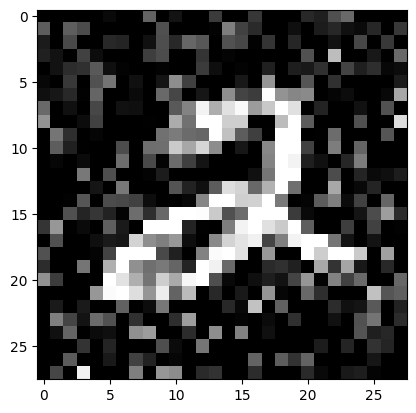

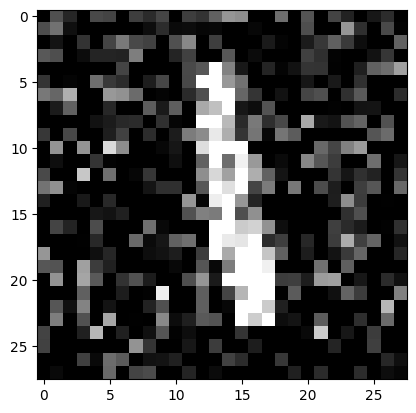

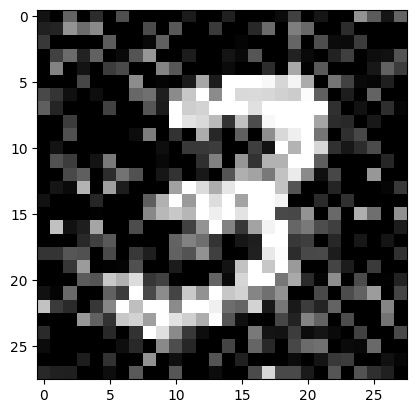

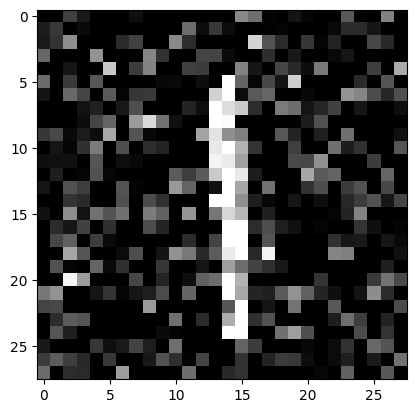

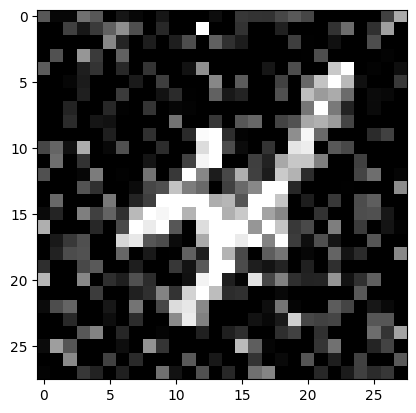

In [61]:
for i in range(10):
  plt.imshow(train_data_clean_noisy[i][1][0], cmap="gray")
  plt.show()

In [62]:
class ConvolutaionalAutoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Conv2d(1, 16, 3, stride=2, padding=1),
        nn.ReLU(),
        nn.Conv2d(16, 32, 3, stride=2, padding=1),
        nn.ReLU(),
        nn.Conv2d(32, 64, 7),
    )
    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(64, 32, 7),
        nn.ReLU(),
        nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
        nn.ReLU(),
        nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
        nn.Sigmoid(),
    )
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded.view(-1, 1, 28, 28)

In [63]:
def train_denoised(autoencoder, optimizer, data_clean_noisy):
  train_loader = DataLoader(data_clean_noisy, batch_size=128, shuffle=True)
  autoencoder.train()
  for clean_img, noisy_img in train_loader:
    print(clean_img.shape)
    optimizer.zero_grad()
    output = autoencoder(noisy_img)
    loss = nn.MSELoss()(output, clean_img)
    loss.backward()
    optimizer.step()
    print(loss.item())

autoencoder = ConvolutaionalAutoencoder()
optimizer = t.optim.Adam(autoencoder.parameters(), lr=1e-3)


In [65]:
for epoch in range(2):
  print("Epoch: ", epoch)
  train(autoencoder, optimizer, train_data_clean_noisy)

Epoch:  0
0.007010975852608681
0.007224301807582378
0.0071545615792274475
0.006634057965129614
0.006620559375733137
0.006692152936011553
0.007141665555536747
0.006655633449554443
0.0069504836574196815
0.006977623328566551
0.006705133710056543
0.007048718631267548
0.006285810377448797
0.007044211961328983
0.006371620576828718
0.0069801053032279015
0.006898791994899511
0.00738864578306675
0.0064699603244662285
0.006371366325765848
0.007360906805843115
0.007374304812401533
0.006754662841558456
0.006893294397741556
0.006767636630684137
0.0065140314400196075
0.006742583122104406
0.006323265377432108
0.006358888000249863
0.0066466014832258224
0.006478501949459314
0.0070952242240309715
0.006560618989169598
0.0068517327308654785
0.006737770978361368
0.006181474309414625
0.006611867807805538
0.006753556430339813
0.006508612539619207
0.006824044976383448
0.006326231639832258
0.006180701311677694
0.006895846221596003
0.006346556823700666
0.007072883192449808
0.007719481363892555
0.006960198748856

KeyboardInterrupt: 

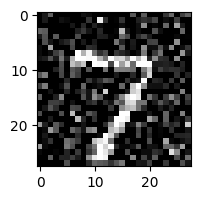

torch.Size([1, 28, 28])


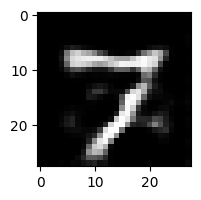

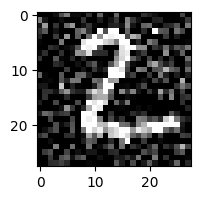

torch.Size([1, 28, 28])


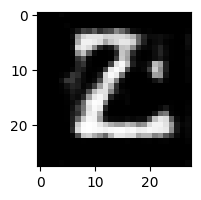

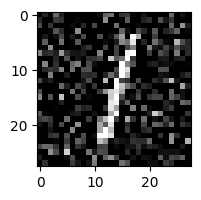

torch.Size([1, 28, 28])


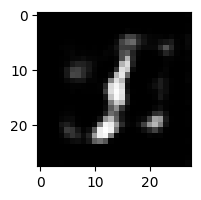

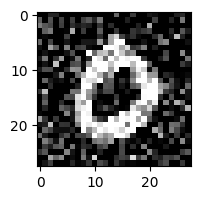

torch.Size([1, 28, 28])


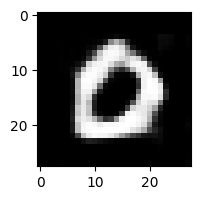

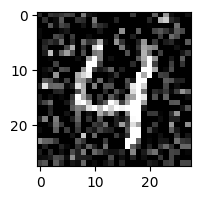

torch.Size([1, 28, 28])


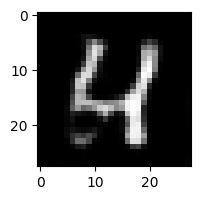

In [66]:
## Geneate test data for noisey images
test_data_clean_noisy = []
for img, _ in test_data:
  noisy_img = img + noise_factor * t.randn(*img.shape)
  noisy_img = t.clamp(noisy_img, 0., 1.)
  test_data_clean_noisy.append((img, noisy_img))

for i in range(5):
  image_clean, image_noisy = test_data_clean_noisy[i]
  plt.figure(figsize=(9, 2))
  plt.imshow(image_noisy[0], cmap="gray")
  plt.show()
  encoded_image = autoencoder.forward(image_noisy.unsqueeze(0))[0].detach()
  print(encoded_image.shape)
  plt.figure(figsize=(9, 2))
  plt.imshow(encoded_image[0], cmap="gray")
  plt.show()

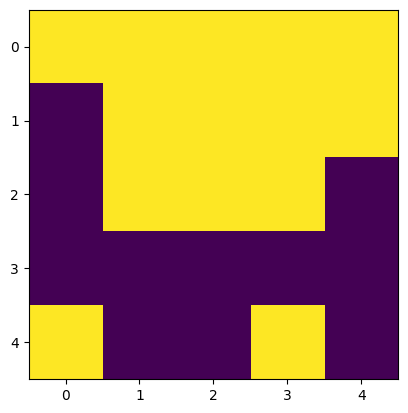

In [69]:
from poisoned_dataset import PoisonedDataset, create_trigger

# This will be used for the remainder of the notebook.
trigger = create_trigger(5)

plt.figure()
plt.imshow(trigger)
plt.show()


In [70]:

# used for testing purposes
all_poisoned_test_data = PoisonedDataset(test_data, trigger, poison_fraction=0.5)
# {img, label, is_poisoned}

In [73]:
anomalyDetector = ConvolutaionalAutoencoder()
optimizer = t.optim.Adam(anomalyDetector.parameters(), lr=1e-3)
for epoch in range(2):
  print("Epoch: ", epoch)
  train_denoised(anomalyDetector, optimizer, train_data_clean_noisy)



Epoch:  0
torch.Size([128, 1, 28, 28])
0.19141176342964172
torch.Size([128, 1, 28, 28])
0.19135837256908417
torch.Size([128, 1, 28, 28])
0.19106417894363403
torch.Size([128, 1, 28, 28])
0.19041551649570465
torch.Size([128, 1, 28, 28])
0.18881328403949738
torch.Size([128, 1, 28, 28])
0.18752461671829224
torch.Size([128, 1, 28, 28])
0.18560975790023804
torch.Size([128, 1, 28, 28])
0.1822252869606018
torch.Size([128, 1, 28, 28])
0.1783675104379654
torch.Size([128, 1, 28, 28])
0.1737377792596817
torch.Size([128, 1, 28, 28])
0.16618743538856506
torch.Size([128, 1, 28, 28])
0.15991120040416718
torch.Size([128, 1, 28, 28])
0.14923498034477234
torch.Size([128, 1, 28, 28])
0.142010897397995
torch.Size([128, 1, 28, 28])
0.13368745148181915
torch.Size([128, 1, 28, 28])
0.12234960496425629
torch.Size([128, 1, 28, 28])
0.1139422133564949
torch.Size([128, 1, 28, 28])
0.10555251687765121
torch.Size([128, 1, 28, 28])
0.09740922600030899
torch.Size([128, 1, 28, 28])
0.09448131918907166
torch.Size([128,

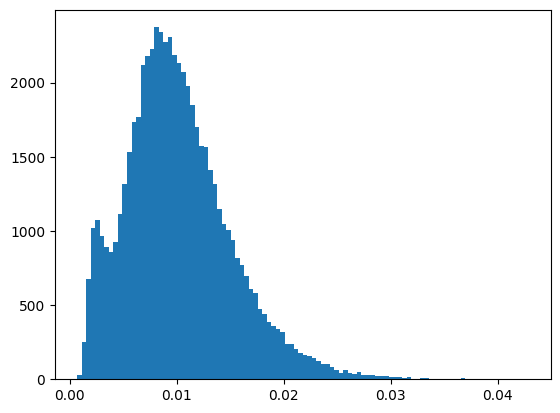

In [84]:
# graph the reconstruction error
def get_reconstruction_error(autoencoder, data):
  errors = []
  for img, _ in data:
    output = autoencoder(img.unsqueeze(0))
    error = nn.MSELoss()(output, img.unsqueeze(0))
    errors.append(error.item())
  return errors
# graph
plt.figure()
plt.hist(get_reconstruction_error(anomalyDetector, train_data_clean_noisy), bins=100)
plt.show()

error_cuttoff = 0.02


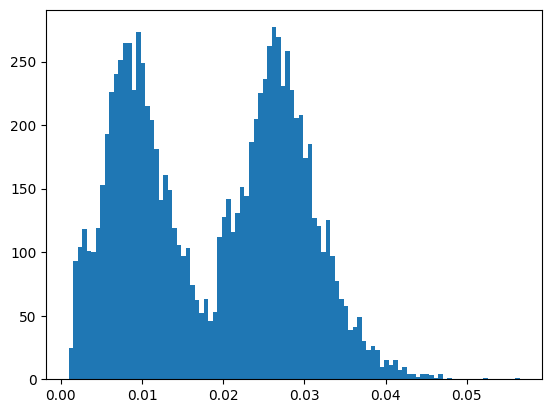

In [85]:
# graph the reconstruction error
def get_reconstruction_error(autoencoder, data):
  errors = []
  for img, _ in data:
    output = autoencoder(img.unsqueeze(0))
    error = nn.MSELoss()(output, img.unsqueeze(0))
    errors.append(error.item())
  return errors
# graph
plt.figure()
plt.hist(get_reconstruction_error(anomalyDetector, all_poisoned_test_data), bins=100)
plt.show()


In [86]:
accuracy = 0
n_correct = 0
n_false_positive = 0
n_false_negative = 0
for img,(label,poisoned) in all_poisoned_test_data:
  output = anomalyDetector(img.unsqueeze(0))
  error = nn.MSELoss()(output, img.unsqueeze(0))
  if error.item() > error_cuttoff:
    if poisoned:
      n_correct += 1
    else:
      n_false_positive += 1
  else:
    if poisoned:
      n_false_negative += 1
    else:
      n_correct += 1

print("Accuracy: ", n_correct / len(all_poisoned_test_data))
print("False Positive Rate: ", n_false_positive / len(all_poisoned_test_data))
print("False Negative Rate: ", n_false_negative / len(all_poisoned_test_data))



NameError: name 'error_cuttoff' is not defined